In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


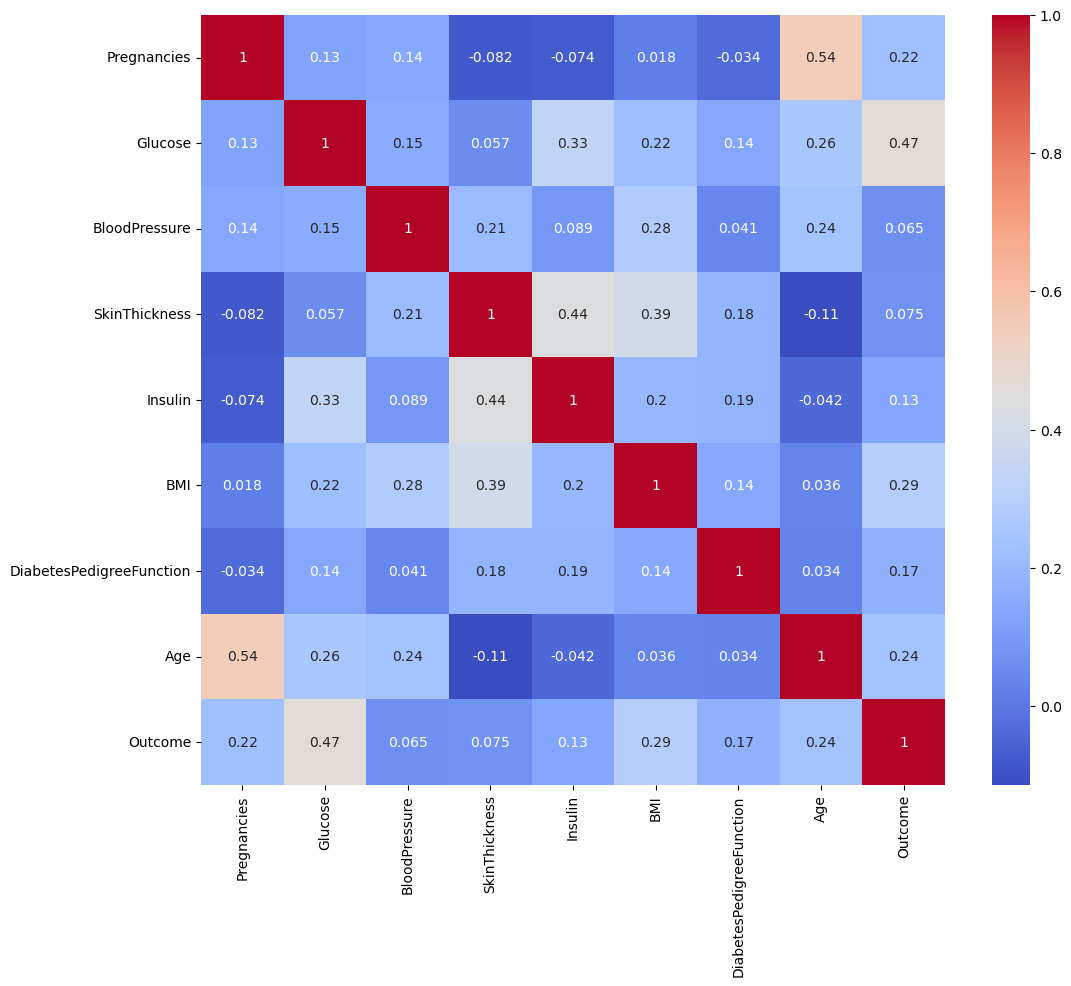

In [8]:
plt.figure(figsize=(12, 10)) 
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [9]:
df = data.drop(['BloodPressure', 'SkinThickness'], axis=1)

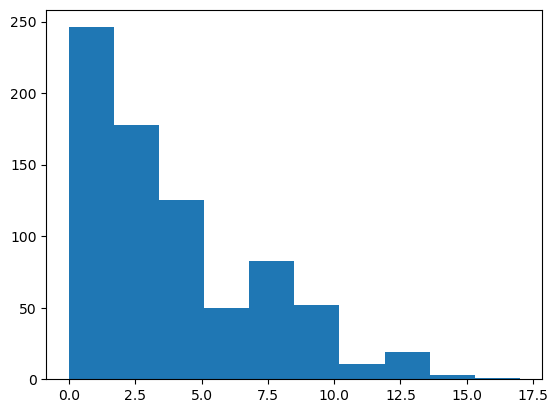

In [10]:
plt.hist(data['Pregnancies'])
plt.show()

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'Age', 'Outcome'],
      dtype='object')

In [12]:
feature = df.drop(['Outcome'], axis = 1)
feature

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33
...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63
764,2,122,0,36.8,0.340,27
765,5,121,112,26.2,0.245,30
766,1,126,0,30.1,0.349,47


In [13]:
#Scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_feature = scaler.fit_transform(feature)

scaled_feature = pd.DataFrame(scaled_feature, columns= feature.columns)

print(scaled_feature.head())


   Pregnancies   Glucose   Insulin       BMI  DiabetesPedigreeFunction  \
0     0.639947  0.848324 -0.692891  0.204013                  0.468492   
1    -0.844885 -1.123396 -0.692891 -0.684422                 -0.365061   
2     1.233880  1.943724 -0.692891 -1.103255                  0.604397   
3    -0.844885 -0.998208  0.123302 -0.494043                 -0.920763   
4    -1.141852  0.504055  0.765836  1.409746                  5.484909   

        Age  
0  1.425995  
1 -0.190672  
2 -0.105584  
3 -1.041549  
4 -0.020496  


In [14]:
#train-test split and using SMOTE to handle with class imbalance
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = scaled_feature  
y = data['Outcome'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: Outcome
0    401
1    213
Name: count, dtype: int64
After SMOTE: Outcome
0    401
1    401
Name: count, dtype: int64


In [15]:
#Fit KNN
from sklearn.neighbors import KNeighborsClassifier

In [16]:
#Obtain optimal k
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_smote, y_train_smote)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

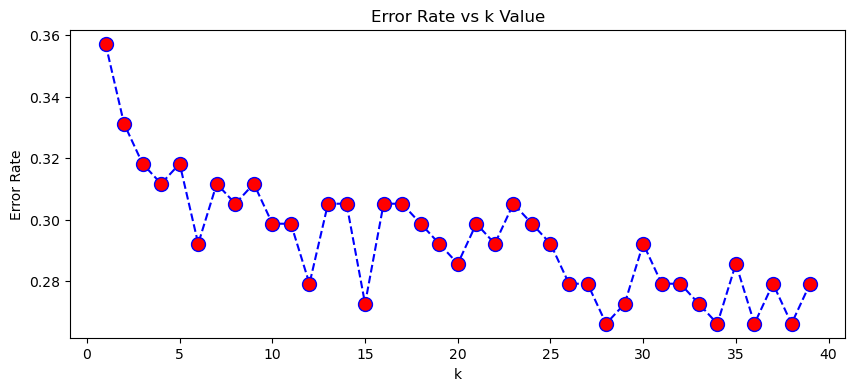

In [17]:
plt.figure(figsize=(10,4))
plt.plot(range(1,40),error_rate, color = 'blue', ls = '--', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()


In [18]:
min(error_rate)

0.2662337662337662

In [19]:
k_det = pd.DataFrame({'k' : range(1,40), 'error_rate' : error_rate}) 
k_det[k_det['error_rate'] == min(k_det['error_rate'])]

,k,error_rate
27,28,0.266234
33,34,0.266234
35,36,0.266234
37,38,0.266234


In [20]:
#Take k = 15
knn_opt = KNeighborsClassifier(n_neighbors=15)
knn_opt.fit(X_train_smote,y_train_smote)

KNeighborsClassifier(n_neighbors=15)

In [21]:
pred_knn = knn_opt.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      0.68      0.76        99
           1       0.58      0.82      0.68        55

    accuracy                           0.73       154
   macro avg       0.73      0.75      0.72       154
weighted avg       0.77      0.73      0.73       154



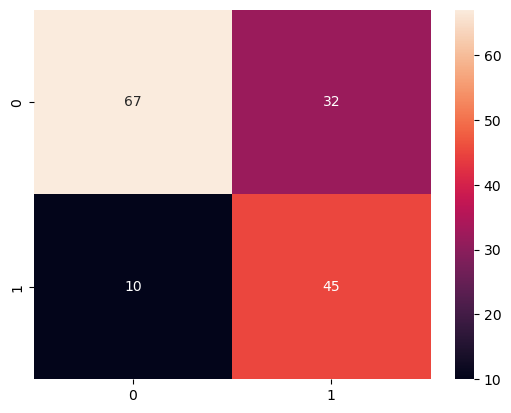

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred_knn))
sns.heatmap(confusion_matrix(y_test, pred_knn), annot = True)
plt.show()

In [23]:
# GridSearchCV with KNN Classifier as estimator
param_grid = {
    'n_neighbors': [15,28],  
    'weights': ['uniform', 'distance'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'leaf_size': [20, 30, 40], 
    'p': [1, 2],  
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']  
}


grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train_smote, y_train_smote)


print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_model_knn = grid_search.best_estimator_
y_pred = best_model_knn.predict(X_test)

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best parameters found:  {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 15, 'p': 2, 'weights': 'distance'}
Best cross-validation score: 0.81
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        99
           1       0.58      0.80      0.67        55

    accuracy                           0.72       154
   macro avg       0.72      0.74      0.71       154
weighted avg       0.76      0.72      0.73       154



In [24]:
#Fit Logistics Regression 

In [25]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [26]:
pred_log = logmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.79      0.69      0.74        99
           1       0.54      0.67      0.60        55

    accuracy                           0.68       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.70      0.68      0.69       154

[[68 31]
 [18 37]]


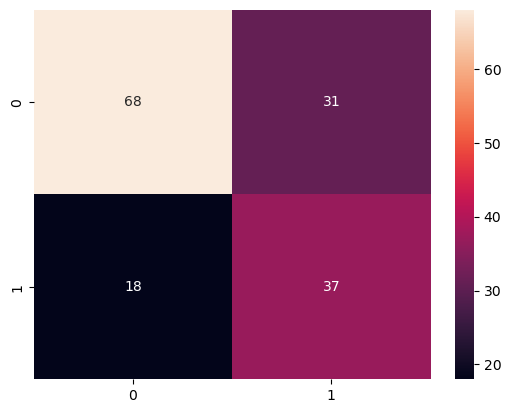

In [27]:
print(classification_report(y_test, pred_log))
print(confusion_matrix(y_test, pred_log))
sns.heatmap(confusion_matrix(y_test, pred_log), annot = True)
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
#Hyper parameter tuning on Logistic Regression model
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'saga'],  
    'max_iter': [100, 200, 300]  
}

grid_search = GridSearchCV(estimator=logmodel, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train_smote, y_train_smote)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_model_log = grid_search.best_estimator_
y_pred = best_model_log.predict(X_test)

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.75
              precision    recall  f1-score   support

           0       0.80      0.69      0.74        99
           1       0.55      0.69      0.61        55

    accuracy                           0.69       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.71      0.69      0.69       154



In [30]:
#Fit Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier()

In [32]:
pred_dt = dt.predict(X_test)

              precision    recall  f1-score   support

           0       0.79      0.76      0.77        99
           1       0.59      0.64      0.61        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.72       154

[[75 24]
 [20 35]]


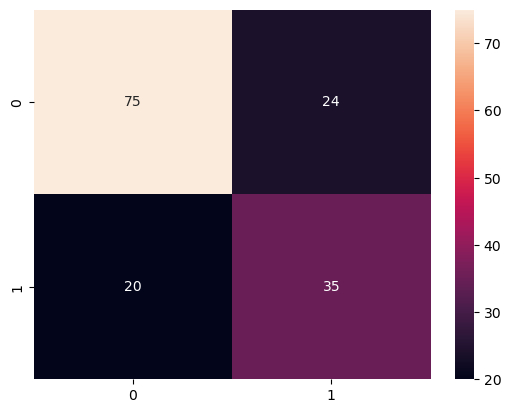

In [33]:
print(classification_report(y_test, pred_dt))
print(confusion_matrix(y_test, pred_dt))
sns.heatmap(confusion_matrix(y_test, pred_dt), annot = True)
plt.show()

In [34]:
#Hyper parameter tuning on Decision Tree model
param_grid = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],   
    'max_features': [None, 'sqrt', 'log2'],  
    'class_weight': [None, 'balanced'],  
}


grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train_smote, y_train_smote)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_model_dt = grid_search.best_estimator_
y_pred = best_model_dt.predict(X_test)

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters found:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10}
Best cross-validation score: 0.79
              precision    recall  f1-score   support

           0       0.76      0.71      0.73        99
           1       0.53      0.60      0.56        55

    accuracy                           0.67       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.67      0.67       154



In [35]:
#Fit Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

rnd = RandomForestClassifier()
rnd.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [37]:
pred_rnd = rnd.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      0.75      0.80        99
           1       0.64      0.80      0.71        55

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.79      0.77      0.77       154



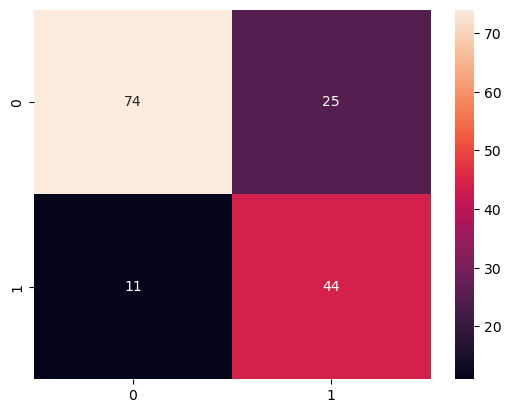

In [38]:
print(classification_report(y_test, pred_rnd))
sns.heatmap(confusion_matrix(y_test, pred_rnd), annot = True)
plt.show()

In [40]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'n_estimators': [50, 100, 200, 300],  
    'max_depth': [None, 10, 20, 30, 40],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2', None],  
    'bootstrap': [True, False], 
    'class_weight': [None, 'balanced', 'balanced_subsample'], 
}

random_search = RandomizedSearchCV(
    estimator=rnd,
    param_distributions=param_dist,
    n_iter=50,  
    scoring='accuracy',
    cv=5,  
    verbose=1,
    n_jobs=-1,  
    random_state=42  
)

random_search.fit(X_train_smote, y_train_smote)

print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

best_model_rnd = random_search.best_estimator_
y_pred = best_model_rnd.predict(X_test)

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'class_weight': None, 'bootstrap': True}
Best cross-validation score: 0.83
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        99
           1       0.64      0.76      0.69        55

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.78      0.76      0.76       154



In [41]:
#Fit XGBoost

In [42]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
pred_xgb = xgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.70      0.76        99
           1       0.58      0.76      0.66        55

    accuracy                           0.72       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.72      0.73       154



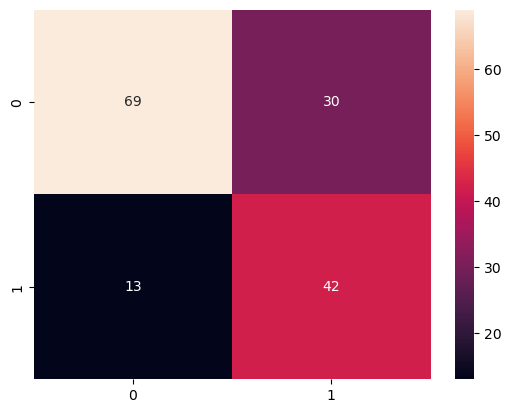

In [44]:
print(classification_report(y_test, pred_xgb))
sns.heatmap(confusion_matrix(y_test, pred_xgb), annot = True)
plt.show()

In [45]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200, 300],  
    'max_depth': [3, 6, 10, 15], 
    'learning_rate': [0.01, 0.05, 0.1, 0.2], 
    'subsample': [0.6, 0.8, 1.0], 
    'colsample_bytree': [0.6, 0.8, 1.0],  
    'gamma': [0, 0.1, 0.2, 0.3],  
    'min_child_weight': [1, 3, 5, 7], 
    'scale_pos_weight': [1, 2, 3],  
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,  
    scoring='accuracy',
    cv=5,  
    verbose=1,
    n_jobs=-1,  
    random_state=42  
)

random_search.fit(X_train_smote, y_train_smote)

print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

best_model_xgb = random_search.best_estimator_
y_pred = best_model_xgb.predict(X_test)

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\ghosh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ghosh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ghosh\anaconda3\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\ghosh\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1512, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                         

Best parameters found:  {'subsample': 0.6, 'scale_pos_weight': 1, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.6}
Best cross-validation score: 0.81
              precision    recall  f1-score   support

           0       0.82      0.68      0.74        99
           1       0.56      0.73      0.63        55

    accuracy                           0.69       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.69      0.70       154



In [47]:
#Fit SVM

In [48]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train_smote, y_train_smote)

SVC(probability=True)

In [49]:
pred_svc = svc.predict(X_test)

              precision    recall  f1-score   support

           0       0.85      0.68      0.75        99
           1       0.57      0.78      0.66        55

    accuracy                           0.71       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.71      0.72       154



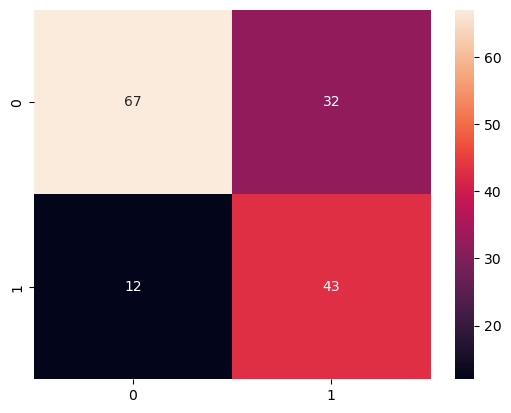

In [50]:
print(classification_report(y_test, pred_svc))
sns.heatmap(confusion_matrix(y_test, pred_svc), annot = True)
plt.show()

In [52]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': [0.1, 1, 10, 100, 1000],  
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  
    'degree': [2, 3, 4, 5], 
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  
    'coef0': [0, 0.1, 0.5, 1],  
    'tol': [1e-3, 1e-4, 1e-5], 
    'class_weight': [None, 'balanced'],  
}

random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_dist,
    n_iter=50,  
    scoring='accuracy',
    cv=5,  
    verbose=1,
    n_jobs=-1,  
    random_state=42  
)

random_search.fit(X_train_smote, y_train_smote)

print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

best_model_svm = random_search.best_estimator_
y_pred = best_model_svm.predict(X_test)

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'tol': 0.0001, 'kernel': 'rbf', 'gamma': 1, 'degree': 5, 'coef0': 0.5, 'class_weight': None, 'C': 10}
Best cross-validation score: 0.82
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154



In [53]:
#ROC-AUC CURVE

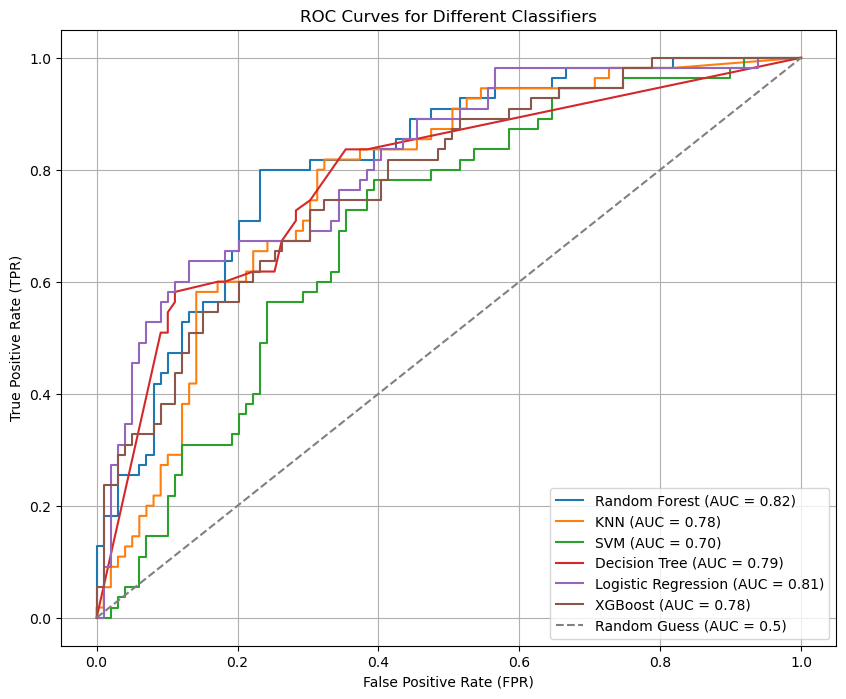

In [54]:
from sklearn.metrics import roc_curve, auc

models = {
    'Random Forest': best_model_rnd,
    'KNN': best_model_knn,
    'SVM': best_model_svm,  # Probability=True to get probabilities
    'Decision Tree': best_model_dt,
    'Logistic Regression': best_model_log,
    'XGBoost': best_model_xgb
}

fpr_dict = {}
tpr_dict = {}
roc_auc_dict = {}

for model_name, model in models.items():
    model.fit(X_train_smote, y_train_smote)  
    y_prob = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    fpr_dict[model_name] = fpr
    tpr_dict[model_name] = tpr
    roc_auc_dict[model_name] = roc_auc

plt.figure(figsize=(10, 8))
for model_name in models.keys():
    plt.plot(fpr_dict[model_name], tpr_dict[model_name], label=f'{model_name} (AUC = {roc_auc_dict[model_name]:.2f})')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Guess (AUC = 0.5)')

# Customize plot
plt.title('ROC Curves for Different Classifiers')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [55]:
# Find the model with the maximum AUC
max_auc_model = max(roc_auc_dict, key=roc_auc_dict.get)
max_auc_value = roc_auc_dict[max_auc_model]


print(f"The model with the maximum AUC is: {max_auc_model} with AUC = {max_auc_value:.2f}")


The model with the maximum AUC is: Random Forest with AUC = 0.82


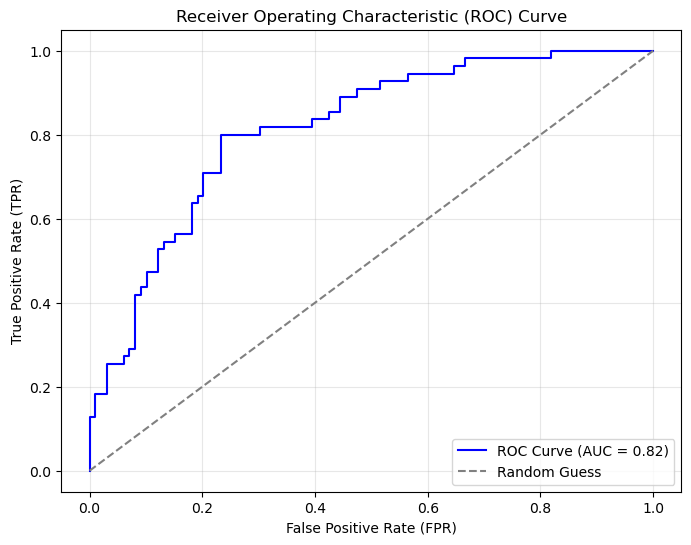

In [56]:
#Logistic Regression
y_prob = best_model_rnd.predict_proba(X_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, y_prob)


roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


In [57]:
distance = np.sqrt(np.square(fpr) + np.square(1 - tpr))

optimal_threshold = thresholds[np.argmin(distance)]

print(f"Optimal threshold from ROC curve: {optimal_threshold:.2f}")


Optimal threshold from ROC curve: 0.53


In [58]:
#Using optimal threshold fit Random Forest

In [59]:
final_model = best_model_rnd

In [60]:
pred_final = final_model.predict(X_test)

In [61]:
print(classification_report(y_test, pred_final))
print(confusion_matrix(y_test, pred_final))

              precision    recall  f1-score   support

           0       0.87      0.75      0.80        99
           1       0.64      0.80      0.71        55

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.79      0.77      0.77       154

[[74 25]
 [11 44]]


In [62]:
#Create the streamlit app

In [66]:
import pickle
# Assuming you have the trained model as 'model'
with open('final_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [67]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)